In [4]:
# Pandas for Data Manipulation
import pandas as pd

import numpy as np

# Matplotlib for visualization
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns
#from datetime import datetime

import warnings
warnings.filterwarnings('ignore')
import itertools
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

from textblob import TextBlob

from sklearn.preprocessing import MinMaxScaler
from nltk.stem.porter import PorterStemmer

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
#import xgboost
#import lightgbm

from pandas.plotting import lag_plot

# For reading stock data from yahoo
#from pandas_datareader.data import DataReader
# For time stamps
#from pandas import datetime
from datetime import datetime

#!pip install pmdarima

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Salman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Salman\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
# Load 'BSESN.csv' in a pandas dataframe 'df'
df = pd.read_csv(r'BSESN.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0
1,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,41558.570313,24300.0
2,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,41673.921875,33300.0
3,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,33600.0
4,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0


In [6]:
df = df[['Date','Close']] 
df.shape

(252, 2)

In [8]:
# Check for any duplicated values
df.isnull().sum()

Date     0
Close    2
dtype: int64

In [9]:
len(df)

252

In [10]:
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    252 non-null    datetime64[ns]
 1   Close   250 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.1 KB


In [11]:
df.describe()

,Date,Close
count,252,250.000000
mean,2020-06-18 20:22:51.428571392,37745.454117
min,2019-12-17 00:00:00,25981.240234
25%,2020-03-17 18:00:00,34257.097656
50%,2020-06-22 12:00:00,38425.974610
75%,2020-09-17 06:00:00,41135.233399
max,2020-12-17 00:00:00,46890.339844
std,NaN,4535.304336


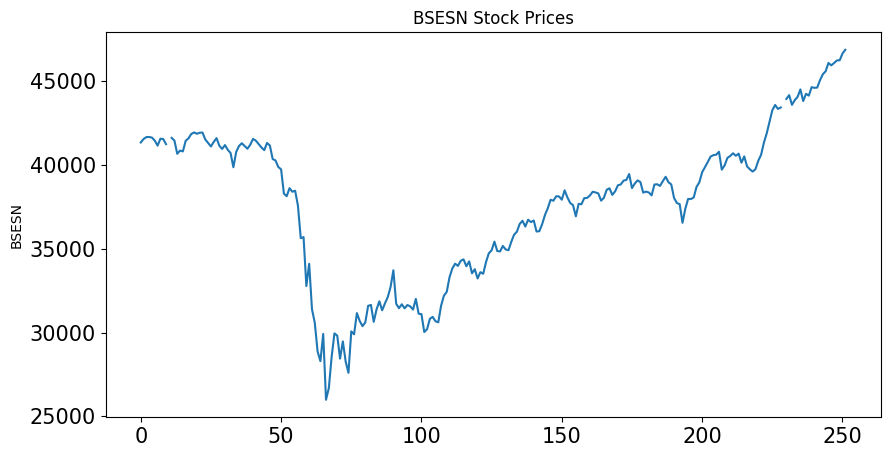

In [12]:
plt.figure(figsize=(10,5))
plt.title('BSESN Stock Prices')
plt.plot(df['Close'])
#plt.xlabel('Team')
# plt.xticks(np.arange(0,1000, 300), df['Date'][0:1000:300])
plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.ylabel('BSESN')
plt.show()

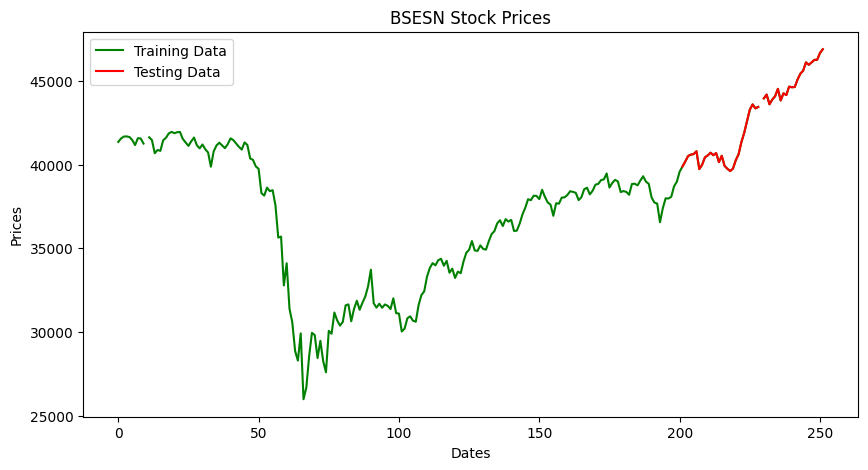

In [13]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(10,5))
plt.title('BSESN Stock Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close'], 'green', label='Training Data')
plt.plot(test_data['Close'], 'red', label='Testing Data')
#plt.xticks(np.arange(0,1500, 300), df['Date'][0:1500:300])
plt.xticks(rotation=0, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.legend()

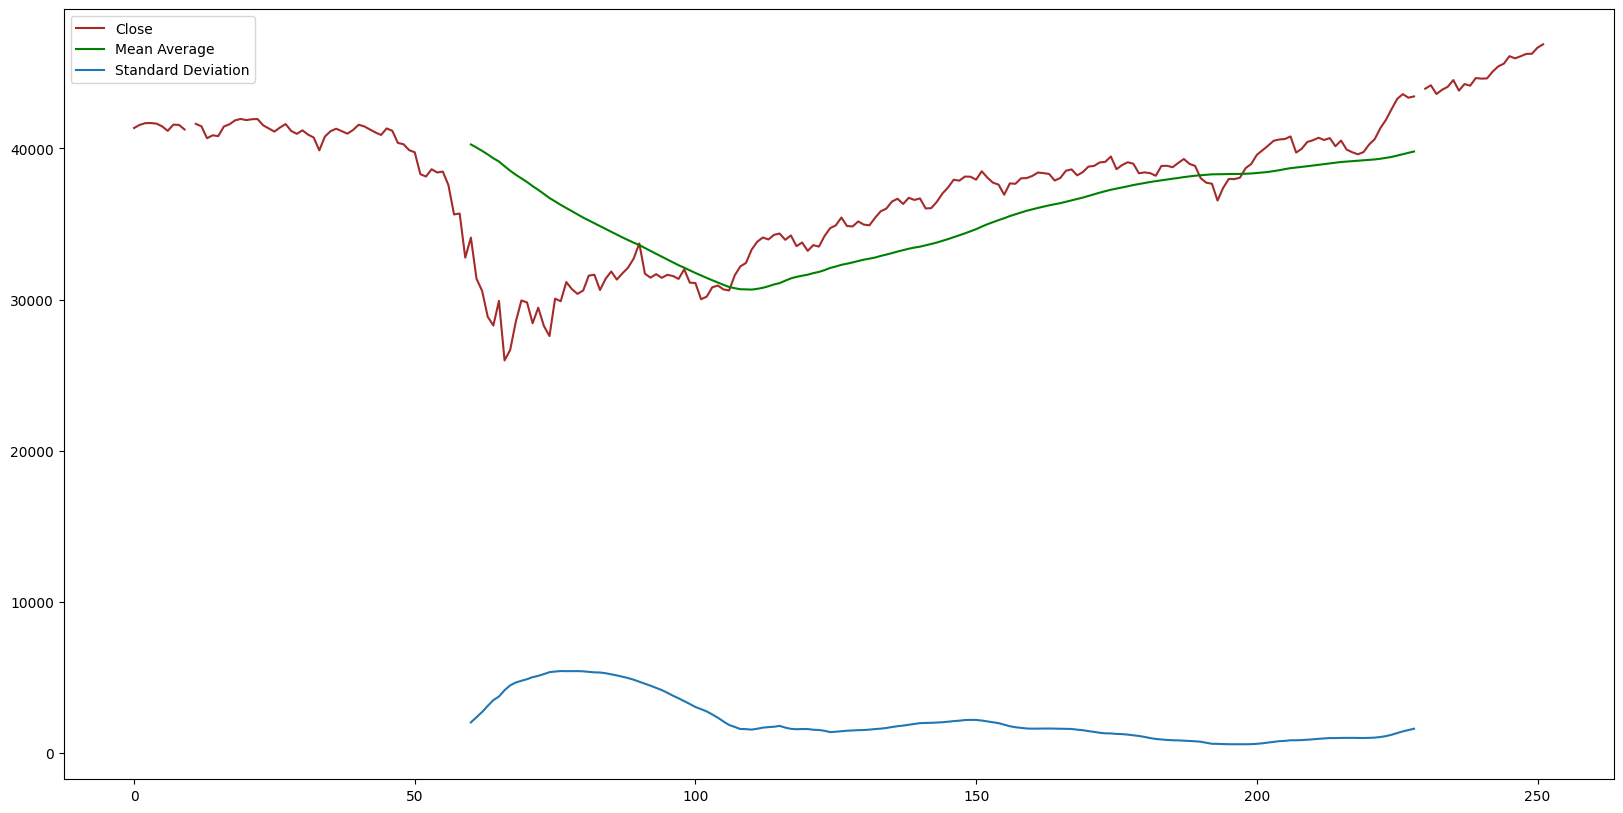

In [14]:
#Plotting moving average
close = df['Close']

ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(20,10))
df['Close'].plot(color='brown',label='Close')
ma.plot(color = 'green',label='Mean Average')
std.plot(label = 'Standard Deviation')
plt.xticks(rotation=0, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.legend()

Text(0.5, 1.0, 'Returns')

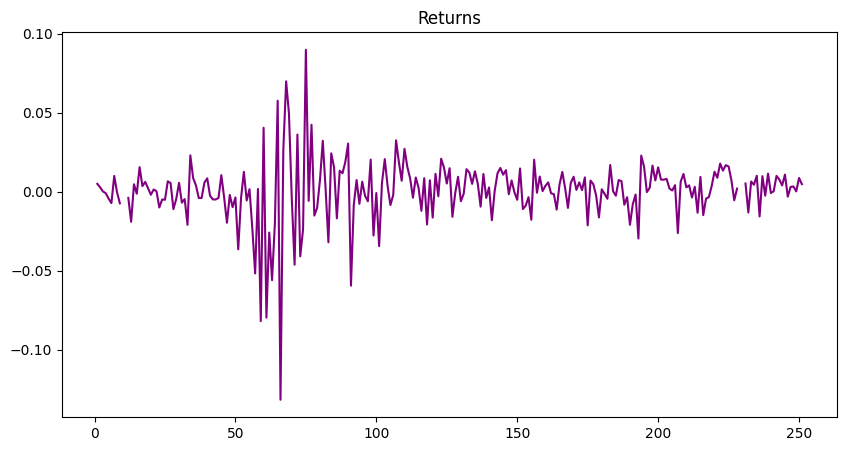

In [15]:
#Plotting returns
returns = close / close.shift(1) - 1

plt.figure(figsize = (10,5))
returns.plot(label='Return', color = 'purple')
plt.xticks(rotation=0, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Returns")

In [17]:
df_news= pd.read_csv(r'india-news-headlines1.csv')
df_news

,Date,Category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
244,20010104,unknown,Experts discuss horticulture development
245,20010104,unknown,5 acquitted in trespassing case
246,20010104,unknown,Development of horticulture stressed
247,20010104,unknown,New office-bearers for ICSI


In [19]:
 #Converting data type of Date column 
 df_news['Date'] = pd.to_datetime(df_news['Date'],format= '%Y%m%d')
 df_news


,Date,Category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic
...,...,...,...
244,2001-01-04,unknown,Experts discuss horticulture development
245,2001-01-04,unknown,5 acquitted in trespassing case
246,2001-01-04,unknown,Development of horticulture stressed
247,2001-01-04,unknown,New office-bearers for ICSI


In [22]:

df_news['headline_text']

0      Status quo will not be disturbed at Ayodhya; s...
1                    Fissures in Hurriyat over Pak visit
2                  America's unwanted heading for India?
3                     For bigwigs; it is destination Goa
4                   Extra buses to clear tourist traffic
                             ...                        
244             Experts discuss horticulture development
245                      5 acquitted in trespassing case
246                 Development of horticulture stressed
247                          New office-bearers for ICSI
248             CM to review security for Premji; Murthy
Name: headline_text, Length: 249, dtype: object

In [24]:
#Cleaning headlines
c = []
for i in range(0,len(df_news['headline_text'])):
    news = re.sub('[^a-zA-Z]',' ',df_news['headline_text'][i])
    news = news.lower()
    news = news.split()
    #news = [ps.stem(word) for word in news if not word in set(stopwords.words('word'))]
    news=' '.join(news)
    c.append(news)

In [26]:
df_news['News'] = pd.Series(c)
df_news

,Date,Category,headline_text,News
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,status quo will not be disturbed at ayodhya sa...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit,fissures in hurriyat over pak visit
2,2001-01-02,unknown,America's unwanted heading for India?,america s unwanted heading for india
3,2001-01-02,unknown,For bigwigs; it is destination Goa,for bigwigs it is destination goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic,extra buses to clear tourist traffic
...,...,...,...,...
244,2001-01-04,unknown,Experts discuss horticulture development,experts discuss horticulture development
245,2001-01-04,unknown,5 acquitted in trespassing case,acquitted in trespassing case
246,2001-01-04,unknown,Development of horticulture stressed,development of horticulture stressed
247,2001-01-04,unknown,New office-bearers for ICSI,new office bearers for icsi


In [27]:
#Calculating score for each news headline in the dataset
i=0 
compound_val = [ ] 
while i<len(df_news):
    
    k = analyser.polarity_scores(df_news.iloc[i]['headline_text'])
    compound_val.append(k['compound'])
    
    i = i+1
    
#converting sentiment values to numpy for easier usage
compound_val = np.array(compound_val)
len(compound_val)

249

In [28]:
df_news['VADER score'] = compound_val

In [29]:
df_news.head()

,Date,Category,headline_text,News,VADER score
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,status quo will not be disturbed at ayodhya sa...,0.2924
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit,fissures in hurriyat over pak visit,0.0000
2,2001-01-02,unknown,America's unwanted heading for India?,america s unwanted heading for india,-0.2263
3,2001-01-02,unknown,For bigwigs; it is destination Goa,for bigwigs it is destination goa,0.0000
4,2001-01-02,unknown,Extra buses to clear tourist traffic,extra buses to clear tourist traffic,0.3818


In [30]:
# Calculating Sentiment value
i = 0
predicted_val = [ ]
while(i<len(df_news)):
    if ((df_news.iloc[i]['VADER score'] >= 0.1)):
        predicted_val.append('positive')
        i = i+1
    elif ((df_news.iloc[i]['VADER score'] > -0.1) & (df_news.iloc[i]['VADER score'] < 0.1)):
        predicted_val.append('neutral')
        i = i+1
    elif ((df_news.iloc[i]['VADER score'] <= -0.1)):
        predicted_val.append('negative')
        i = i+1

In [31]:
df_news['sentiment'] = predicted_val
df_news.head()

,Date,Category,headline_text,News,VADER score,sentiment
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,status quo will not be disturbed at ayodhya sa...,0.2924,positive
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit,fissures in hurriyat over pak visit,0.0000,neutral
2,2001-01-02,unknown,America's unwanted heading for India?,america s unwanted heading for india,-0.2263,negative
3,2001-01-02,unknown,For bigwigs; it is destination Goa,for bigwigs it is destination goa,0.0000,neutral
4,2001-01-02,unknown,Extra buses to clear tourist traffic,extra buses to clear tourist traffic,0.3818,positive


In [32]:
df_news.sentiment.value_counts()

sentiment
neutral     149
positive     53
negative     47
Name: count, dtype: int64

In [33]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [34]:
#Adding subjectivity and polarity columns
df_news['Subjectivity'] = df_news['headline_text'].apply(getSubjectivity)
df_news['Polarity'] = df_news['headline_text'].apply(getPolarity)
df_news

,Date,Category,headline_text,News,VADER score,sentiment,Subjectivity,Polarity
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,status quo will not be disturbed at ayodhya sa...,0.2924,positive,0.000000,0.000000
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit,fissures in hurriyat over pak visit,0.0000,neutral,0.000000,0.000000
2,2001-01-02,unknown,America's unwanted heading for India?,america s unwanted heading for india,-0.2263,negative,0.000000,0.000000
3,2001-01-02,unknown,For bigwigs; it is destination Goa,for bigwigs it is destination goa,0.0000,neutral,0.000000,0.000000
4,2001-01-02,unknown,Extra buses to clear tourist traffic,extra buses to clear tourist traffic,0.3818,positive,0.241667,0.050000
...,...,...,...,...,...,...,...,...
244,2001-01-04,unknown,Experts discuss horticulture development,experts discuss horticulture development,0.0000,neutral,0.000000,0.000000
245,2001-01-04,unknown,5 acquitted in trespassing case,acquitted in trespassing case,0.2500,positive,0.000000,0.000000
246,2001-01-04,unknown,Development of horticulture stressed,development of horticulture stressed,-0.3400,negative,0.000000,0.000000
247,2001-01-04,unknown,New office-bearers for ICSI,new office bearers for icsi,0.0000,neutral,0.454545,0.136364


<Axes: >

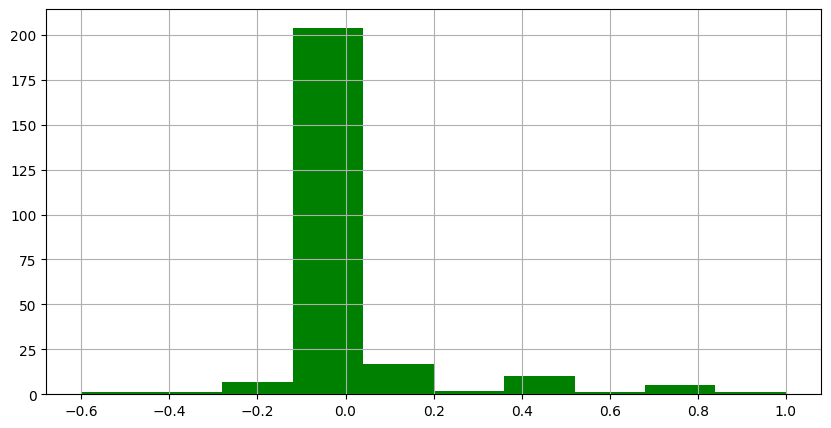

In [35]:
plt.figure(figsize = (10,5))
df_news['Polarity'].hist(color = 'green')
#data['smoker'].value_counts().plot(kind = 'bar', rot = 0)

<Axes: >

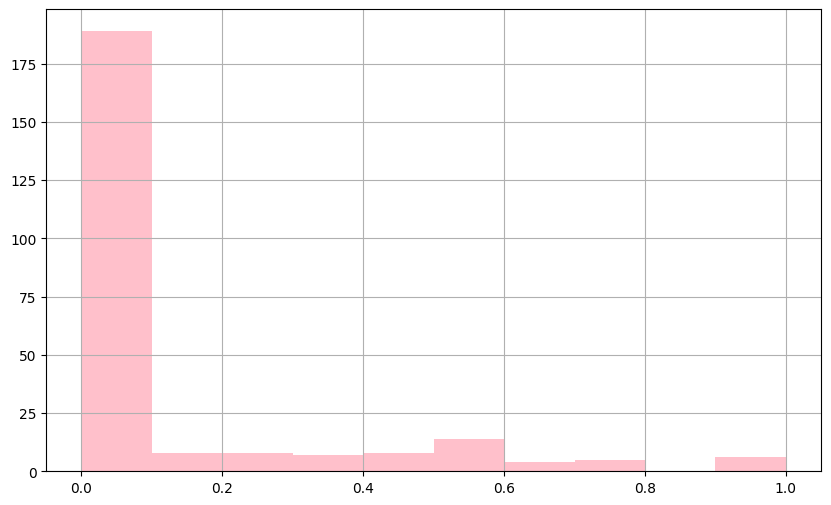

In [36]:
plt.figure(figsize = (10,6))
df_news['Subjectivity'].hist(color = 'pink')


In [37]:
#Adding sentiment score to df_news
sia = SentimentIntensityAnalyzer()

#df_news['Compound'] = [sia.polarity_scores(v)['compound'] for v in df_news['headline_text]]
df_news['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_news['headline_text']]
df_news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in df_news['headline_text']]
df_news['Positive'] = [sia.polarity_scores(v)['pos'] for v in df_news['headline_text']]
df_news

,Date,Category,headline_text,News,VADER score,sentiment,Subjectivity,Polarity,Negative,Neutral,Positive
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,status quo will not be disturbed at ayodhya sa...,0.2924,positive,0.000000,0.000000,0.000,0.805,0.195
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit,fissures in hurriyat over pak visit,0.0000,neutral,0.000000,0.000000,0.000,1.000,0.000
2,2001-01-02,unknown,America's unwanted heading for India?,america s unwanted heading for india,-0.2263,negative,0.000000,0.000000,0.322,0.678,0.000
3,2001-01-02,unknown,For bigwigs; it is destination Goa,for bigwigs it is destination goa,0.0000,neutral,0.000000,0.000000,0.000,1.000,0.000
4,2001-01-02,unknown,Extra buses to clear tourist traffic,extra buses to clear tourist traffic,0.3818,positive,0.241667,0.050000,0.000,0.658,0.342
...,...,...,...,...,...,...,...,...,...,...,...
244,2001-01-04,unknown,Experts discuss horticulture development,experts discuss horticulture development,0.0000,neutral,0.000000,0.000000,0.000,1.000,0.000
245,2001-01-04,unknown,5 acquitted in trespassing case,acquitted in trespassing case,0.2500,positive,0.000000,0.000000,0.000,0.600,0.400
246,2001-01-04,unknown,Development of horticulture stressed,development of horticulture stressed,-0.3400,negative,0.000000,0.000000,0.444,0.556,0.000
247,2001-01-04,unknown,New office-bearers for ICSI,new office bearers for icsi,0.0000,neutral,0.454545,0.136364,0.000,1.000,0.000


In [38]:
df_merge = pd.merge(df, df_news, how='inner', on='Date')
df_merge

,Date,Close,Category,headline_text,News,VADER score,sentiment,Subjectivity,Polarity,Negative,Neutral,Positive


In [39]:
df_merge = pd.merge(df, df_news, how='left', on='Date')
df_merge

,Date,Close,Category,headline_text,News,VADER score,sentiment,Subjectivity,Polarity,Negative,Neutral,Positive
0,2019-12-17,41352.171875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-18,41558.570313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-12-19,41673.921875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-20,41681.539063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-23,41642.660156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
247,2020-12-11,46099.011719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,2020-12-14,46253.460938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,2020-12-15,46263.171875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,2020-12-16,46666.460938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df = df_merge[['Close','Subjectivity', 'Polarity']]
df 

,Close,Subjectivity,Polarity
0,41352.171875,NaN,NaN
1,41558.570313,NaN,NaN
2,41673.921875,NaN,NaN
3,41681.539063,NaN,NaN
4,41642.660156,NaN,NaN
...,...,...,...
247,46099.011719,NaN,NaN
248,46253.460938,NaN,NaN
249,46263.171875,NaN,NaN
250,46666.460938,NaN,NaN


In [41]:
df_merge = df_merge.dropna()

In [42]:
df_merge_filled_zero = df_merge.fillna(0)

In [43]:
df_merge_filled_empty = df_merge.fillna('')

In [44]:
df_merge_ffill = df_merge.ffill()

In [45]:
df_merge_bfill = df_merge.bfill()

In [46]:
print("Original Merged DataFrame:\n", df_merge)
#print("After Dropping NaN Values:\n", df_merge_dropped)
print("After Filling NaN Values with 0:\n", df_merge_filled_zero)
print("After Filling NaN Values with Empty String:\n", df_merge_filled_empty)
print("After Forward Filling NaN Values:\n", df_merge_ffill)
print("After Backward Filling NaN Values:\n", df_merge_bfill)

Original Merged DataFrame:
 Empty DataFrame
Columns: [Date, Close, Category, headline_text, News, VADER score, sentiment, Subjectivity, Polarity, Negative, Neutral, Positive]
Index: []
After Filling NaN Values with 0:
 Empty DataFrame
Columns: [Date, Close, Category, headline_text, News, VADER score, sentiment, Subjectivity, Polarity, Negative, Neutral, Positive]
Index: []
After Filling NaN Values with Empty String:
 Empty DataFrame
Columns: [Date, Close, Category, headline_text, News, VADER score, sentiment, Subjectivity, Polarity, Negative, Neutral, Positive]
Index: []
After Forward Filling NaN Values:
 Empty DataFrame
Columns: [Date, Close, Category, headline_text, News, VADER score, sentiment, Subjectivity, Polarity, Negative, Neutral, Positive]
Index: []
After Backward Filling NaN Values:
 Empty DataFrame
Columns: [Date, Close, Category, headline_text, News, VADER score, sentiment, Subjectivity, Polarity, Negative, Neutral, Positive]
Index: []


In [47]:
df_news=df_merge[['Close','sentiment']]
df_news

,Close,sentiment


In [48]:
df_news.groupby(['sentiment']).mean()


,Close
sentiment,
